In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read csv

df = pd.read_csv(r"D:\internship\SSPL_Internship_Tasks\EDA_task_12_aug\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# 1.Understanding data 

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

In [10]:
# total null values for each column

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# filling null values of director,cast and country as unknown 

df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df[['director', 'cast', 'country']].isnull().sum()

director    0
cast        0
country     0
dtype: int64

In [12]:
# filling null dates with pd.Nat (not a time)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(pd.NaT)

# Format to standard YYYY-MM-DD, keeping NaT for missing
df['date_added'] = df['date_added'].dt.strftime('%Y-%m-%d')

df['date_added'].head(10)

0    2021-09-25
1    2021-09-24
2    2021-09-24
3    2021-09-24
4    2021-09-24
5    2021-09-24
6    2021-09-24
7    2021-09-24
8    2021-09-24
9    2021-09-24
Name: date_added, dtype: object

In [13]:
# filling the ratings with mode grouped by director 

df['rating'] = df.groupby('director')['rating'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.NaN)
)
df['rating'].isnull().sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_40580\1952298473.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.NaN)


1

In [14]:
# droping rows with null durations

df = df.dropna(subset=['duration'])

In [15]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8706 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


(8804, 12)

In [16]:
# Convert release_year to integer type
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

# Check type and missing values
print(df['release_year'].dtype)
print(df['release_year'].isnull().sum())

Int64
0


In [17]:
df.nunique()

show_id         8804
type               2
title           8804
director        4528
cast            7692
country          749
date_added      1698
release_year      74
rating            14
duration         220
listed_in        514
description     8772
dtype: int64

In [18]:
# Univariate Analysis

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

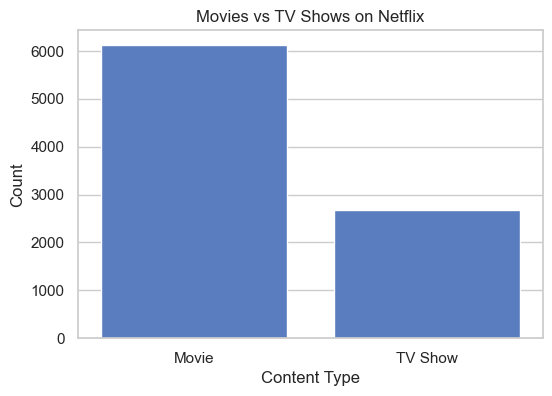

In [19]:
# Movies vs TV shows

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

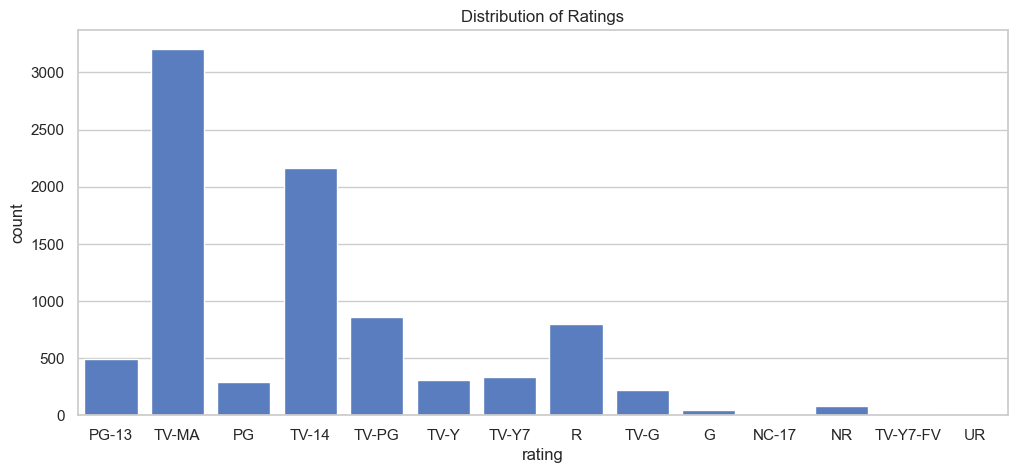

In [20]:
# Categorical: Rating distribution

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='rating')
plt.title("Distribution of Ratings")
plt.show()

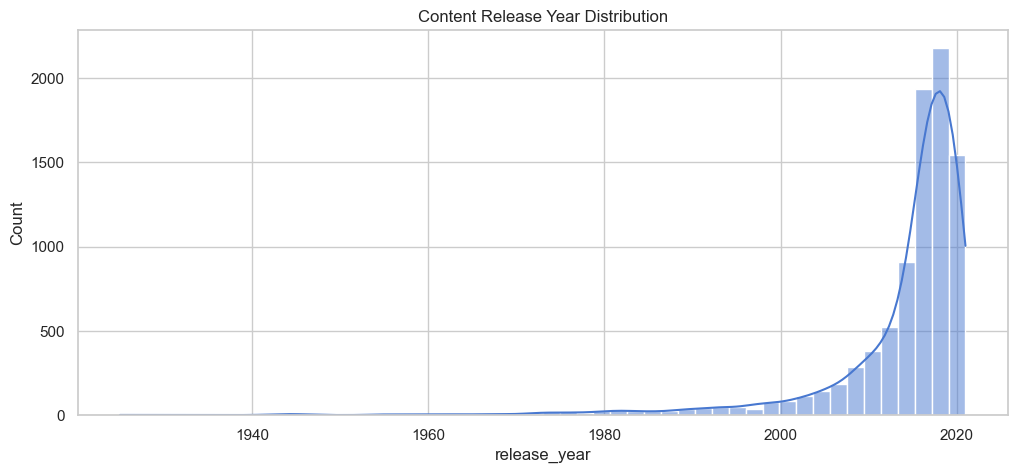

In [21]:
# Numerical: Release Year distribution

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='release_year', bins=50, kde=True)
plt.title("Content Release Year Distribution")
plt.show()

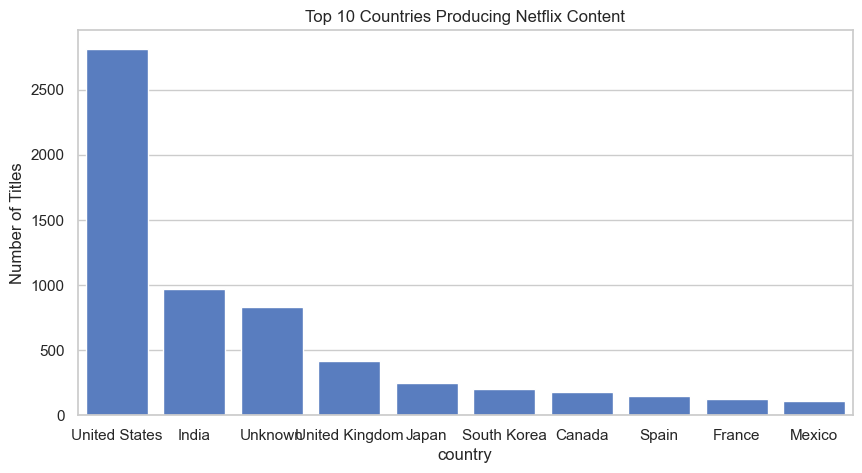

In [22]:
# top 10 countries producing movies

top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries Producing Netflix Content")
plt.ylabel("Number of Titles")
plt.show()

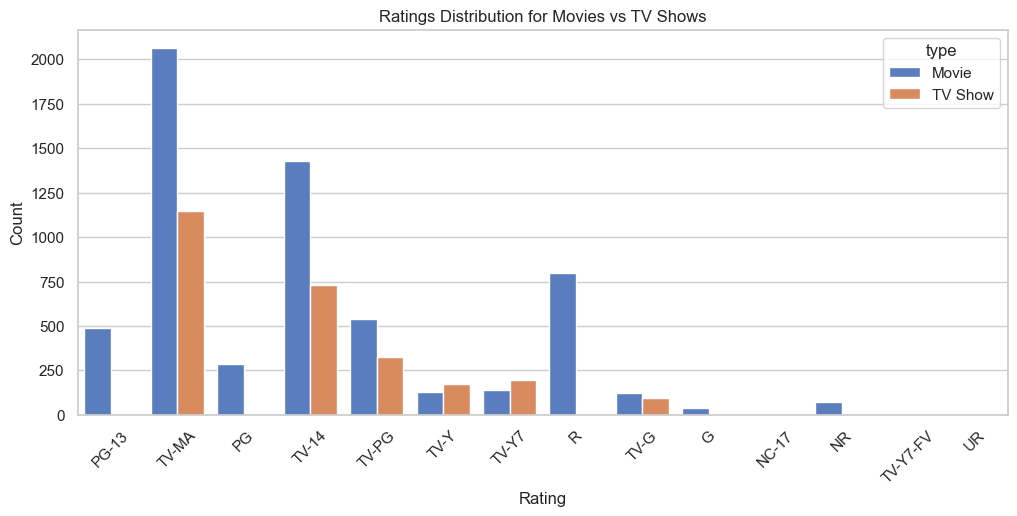

In [23]:
# Bivariate analysis

# Rating vs Type
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='rating', hue='type')
plt.title("Ratings Distribution for Movies vs TV Shows")
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

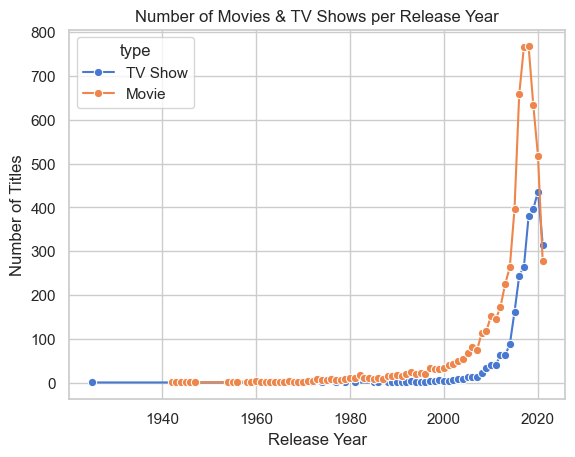

In [24]:
# movies released per year

count_per_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
count_per_year = count_per_year.sort_values('release_year')

sns.lineplot(data=count_per_year, x='release_year', y='show_id', hue='type', marker="o")
plt.title("Number of Movies & TV Shows per Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
